# Project: Wrangling and Analyzing We Rate Dogs Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import os
import requests
import json
% matplotlib inline

## Data Gathering
In the cell below, **all** three pieces of data for this project will be gathered and loaded into the notebook. **Note:** the methods required to gather each data are different.
1. Directly Downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Load the downloaded Twitter archive data into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Creating folder image prediction file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#Downloading the tweet image prediction using the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [5]:
#Accessing file with file handler
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
#Checking the created directory for image prediction file
os.listdir(folder_name)

['image-predictions.tsv', '.ipynb_checkpoints']

In [7]:
#Reading the image prediction tsv file into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
#Creating Twitter API with API key,API secret, Access key and Token

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'oG9viySmNBmCtDDMNxfuXPxso0ijdIvr984mm3LmvbufB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

In [9]:
# Using the tweet_ids from the enhanced twitter archive to download with the Twitter API
tweet_ids = twitter_archive.tweet_id.values
print("Number of tweet_ids: " + str(len(tweet_ids)) + "\n")

counts = 0
json_list = []
failed_loop = {}


for tweet_id in tweet_ids:
    counts += 1
    try:
        #Getting the tweet's JSON data and appending it to the JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # seperating failed tweet loops
        print("TweepError for id:  " + str(tweet_id))
        failed_loop[tweet_id] = err
        pass
    # printing tweets in 100s
    if counts % 100 == 0:
        print("loop number " + str(counts))

# list of failed loops
print("Number of TweepErrors:  {}\n".format(len(failed_loop)))
for tweet_id in failed_loop:
    print(tweet_id, failed_loop[tweet_id])

Number of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop number 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
TweepError for id:  856330835276025856
loop number 200
TweepError for id:  851953902622658560
TweepError for id:  851861385021730816
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop number 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop number 400
loop number 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop number 600
loop number 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loo

In [10]:
#Saving the JSON file to a Text file
tweet_file = 'tweet_json.txt'

In [11]:
#Save the JSON file to the outfile
with open(tweet_file, 'w') as outfile:
    for json_tweet in json_list:
        json.dump(json_tweet, outfile)
        outfile.write('\n')

In [12]:
#Read the Json file from the text file and save to dataframe
json_tweet_file = []
with open(tweet_file, 'r') as json_list:
    line = json_list.readline()
    #Extracting specific columns from the JSON file
    while line:
        data = json.loads(line)
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        #Creating columns in the JSON file with dictionary
        json_dataset = {'tweet_id': data_id,
                       'retweet_count': data_retweet_count,
                       'favorite_count' : data_favorite_count}
        json_tweet_file.append(json_dataset)
        line = json_list.readline()

In [13]:
#loading the file into a dataframe 
twitter_api = pd.DataFrame(json_tweet_file, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [14]:
#Checking the dataframe
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
1,892177421306343426,5302,29337
2,891815181378084864,3481,22060
3,891689557279858688,7227,36947
4,891327558926688256,7763,35315


## Assessing Data

In [15]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1759,678740035362037760,NaN,NaN,2015-12-21 00:53:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tango. He's a large dog. Doesn't care muc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,None,None,None,None
240,846514051647705089,NaN,NaN,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,None,None,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
1752,678969228704284672,NaN,NaN,2015-12-21 16:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678969228...,11,10,Lola,None,None,None,None
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385...,10,10,None,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
1396,699788877217865730,NaN,NaN,2016-02-17 02:54:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Nala. She's a Freckled High Brusc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699788877...,12,10,Nala,None,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None


In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Bailey            7
Buddy             7
Toby              7
an                7
Daisy             7
Dave              6
Bella             6
Oscar             6
Leo               6
Milo              6
Koda              6
Stanley           6
Rusty             6
Jack              6
Jax               6
Scout             6
George            5
               ... 
Gert              1
DayZ              1
Jed               1
Jo                1
Remy              1
Wishes            1
Leonard           1
Snicku            1
Banditt           1
Eevee             1
Danny             1
Julio             1
unacceptable      1
Emanuel           1
Dale              1
Sobe              1
Apollo            1
Strudel           1
Amber             1


In [20]:
sum(twitter_archive.expanded_urls.isna())

59

In [21]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [22]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archive[twitter_archive.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [24]:
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [25]:
sum(twitter_archive.tweet_id.duplicated())

0

In [26]:
twitter_archive[twitter_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [27]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Bailey            7
Buddy             7
Toby              7
an                7
Daisy             7
Dave              6
Bella             6
Oscar             6
Leo               6
Milo              6
Koda              6
Stanley           6
Rusty             6
Jack              6
Jax               6
Scout             6
George            5
               ... 
Gert              1
DayZ              1
Jed               1
Jo                1
Remy              1
Wishes            1
Leonard           1
Snicku            1
Banditt           1
Eevee             1
Danny             1
Julio             1
unacceptable      1
Emanuel           1
Dale              1
Sobe              1
Apollo            1
Strudel           1
Amber             1


In [28]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397,True,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland_sheepdog,0.063703,True
1904,852189679701164033,https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg,1,barrow,0.423150,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True
1643,808001312164028416,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador_retriever,0.730959,True,Staffordshire_bullterrier,0.130726,True,American_Staffordshire_terrier,0.028853,True
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
709,685268753634967552,https://pbs.twimg.com/media/CYKQS0xUQAEOptC.jpg,1,pug,0.999044,True,Norwegian_elkhound,0.000547,True,bull_mastiff,0.000235,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True


In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
twitter_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
1,892177421306343426,5302,29337
2,891815181378084864,3481,22060
3,891689557279858688,7227,36947
4,891327558926688256,7763,35315
5,891087950875897856,2602,17813
6,890971913173991426,1665,10369
7,890729181411237888,15759,56878
8,890609185150312448,3622,24529
9,890240255349198849,6101,27966


In [32]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [33]:
sum(twitter_api.tweet_id.duplicated())

0

In [34]:
twitter_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2472.016760,7056.606360
std,6.820795e+16,4186.310401,10965.682185
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1226.000000
50%,7.178418e+17,1149.000000,3052.000000
75%,7.986547e+17,2862.500000,8608.000000
max,8.924206e+17,70771.000000,144933.000000


In [35]:
all_columns = pd.Series(list(twitter_archive) + list(twitter_api) + list(image_predictions))
all_columns[all_columns.duplicated()]


17    tweet_id
20    tweet_id
dtype: object

### Quality issues

1. The twitter Archive contains 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). 

2. Wrong datatype for Timestamp in Twitter Archive

3. Invalid names present in Twitter archive name's column

4. Denominator found different from the standard ratings 10 (Twitter Archive)

5. Numerator ratings greater than 15 (Twitter Archive)

6. Missing Data in expanded_urls (Twitter Archive)

7. The image predictions dataset contains 281 missing data

8. Tweet id in int datatype instead of string (Twitter Archive)

9. Default None data in dog names (Twitter Archive)

10. Twitter API missing data recorded as TweepError (cannot be cleaned)

### Tidiness issues
1. Reply Column in Twitter Archive (Only Considering Original Tweets)

2. Twitter API dataset should be part of Twitter archive dataset

3. Only One rating Table is needed i.e Numerator since Denominator will be standardized

4. image prediction columns can be merged to reduce the columns and merged with twitter archive data set

## Cleaning Data

In [36]:
#Making copies of original pieces of dataset
archive = twitter_archive.copy()
image = image_predictions.copy()
api = twitter_api.copy()

### Quality Issue #1:  


#### 181 Retweets columns in Twitter archive Dataset

##### Define: Dropping all rows containing retweets: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. Since are only interested in original tweets

#### Code

In [37]:
#Dropping all rows containing retweet_status_id
archive = archive[archive.retweeted_status_id.isna()]

In [38]:
#Dropping all columns containing retweet details
archive = archive.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

#### Test

In [39]:
#Checking to see all retweeted columns are removed
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Quality Issue #2: 

####  Wrong Datatype for Timestamp (Twitter Archive)

#### Define: Convert timestamp from string to datetime 

#### Code

In [40]:
#Changing the timestamp datatype from string to datetime dataype
archive['timestamp'] = pd.to_datetime(archive['timestamp'])

#### Test

In [41]:
#Checking the datatype of timestamp
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


### Tidiness Issue #1: Reply Column in Twitter Archive (Only Considering Original Tweets)

#### Define: Remove rows and columns containing informations on reply tweets

#### Code

In [42]:
#Removing rows containing 78 reply tweets
archive = archive[archive.in_reply_to_status_id.isna()]

In [43]:
#Dropping columns with reply id
archive = archive.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

#### Test


In [44]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Quality Issue #3:  Invalid names present in Twitter archive name's column

#### Define: Changing invalid names to None

#### Code

In [45]:
#Masking invalid names from the archive(name) column
name_mask = archive.name.str.contains('^[a-z]', regex = True)
archive[name_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [46]:
#Changing masked names to None
archive.loc[name_mask, 'name'] = "None"

#### Test

In [47]:
archive['name'].value_counts()

None         707
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Bo             6
Stanley        6
Bella          6
Koda           6
Bailey         6
Jax            6
Oscar          6
Milo           5
Dave           5
Chester        5
Leo            5
Rusty          5
Scout          5
Bentley        5
Louis          5
Buddy          5
Phil           4
Brody          4
            ... 
Holly          1
Vince          1
Marq           1
Dallas         1
Pilot          1
Amy            1
Amber          1
Banditt        1
Pumpkin        1
Ike            1
Tuck           1
Philbert       1
Napolean       1
Franq          1
Aldrick        1
Jiminus        1
Sierra         1
Sweet          1
Fizz           1
Strudel        1
Snicku         1
Eevee          1
Danny          1
Julio          1
Alejandro      1
Emanuel        1
Dale           1
Sobe          

### Quality Issue #4:  Denominator found different from the standard ratings (10)

#### Define: Replace wrongly extracted ratings and remove others

#### Code

In [48]:
#Masking denominator other than 10
mask_find = (archive.rating_denominator != 10)

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


Fixing poorly extracted ratings

In [49]:
# Fixing tweet_id 716439118184652801: by replacing 50/50 with 11/10
mask_row = archive.tweet_id == 716439118184652801
archive.loc[mask_row, 'rating_numerator'] = 11
archive.loc[mask_row, 'rating_denominator'] = 10

# Fixing tweet_id 740373189193256964: by replacing 9/11 with 14/10
mask_row = archive.tweet_id == 740373189193256964
archive.loc[mask_row, 'rating_numerator'] = 14
archive.loc[mask_row, 'rating_denominator'] = 10

#Fixing tweet_id 740373189193256964: replacing 9/11 with 14/10
mask_row = archive.tweet_id == 666287406224695296
archive.loc[mask_row, 'rating_numerator'] = 9
archive.loc[mask_row, 'rating_denominator'] = 10

#Fixing tweet_id 666287406224695296: replacing 1/2 with 9/10
mask_row = archive.tweet_id == 682962037429899265
archive.loc[mask_row, 'rating_numerator'] = 10
archive.loc[mask_row, 'rating_denominator'] = 10



In [50]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive[(archive.tweet_id == 740373189193256964) | \
              (archive.tweet_id == 716439118184652801) | \
              (archive.tweet_id == 682962037429899265) | \
              (archive.tweet_id == 666287406224695296) ][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9,10


In [51]:
#Dropping wrongly inputed ratings
archive = archive[archive.rating_denominator == 10]

In [52]:
#Checking for data counts in denominator rating
archive.rating_denominator.value_counts()

10    2084
Name: rating_denominator, dtype: int64

### Quality Issue #5:  Numerator ratings greater than 15

#### Define: Drop ratings greater than 15

#### Code

In [53]:
#Sorting value Count in the numerator rating column
archive.rating_numerator.value_counts().sort_index()

0         1
1         4
2         9
3        19
4        15
5        34
6        32
7        51
8        98
9       153
10      437
11      414
12      486
13      287
14       39
26        1
27        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [54]:
#Dropping numerator rating greater than 15
archive = archive[archive.rating_numerator < 15]

#### Test

In [55]:
archive.rating_numerator.value_counts().sort_index()

0       1
1       4
2       9
3      19
4      15
5      34
6      32
7      51
8      98
9     153
10    437
11    414
12    486
13    287
14     39
Name: rating_numerator, dtype: int64

In [56]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### Tidiness Issue #2:  Twitter api should be part of Twitter Archive

#### Define: Merge twitter api and twitter archive datasets

#### Code

In [57]:
#Merging retweet counts and favorite count with twitter Archive dataset
archive = pd.merge(archive, api, 
                         on = 'tweet_id', how = 'left')

In [58]:
#check to confirm merger
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2078
Data columns (total 14 columns):
tweet_id              2079 non-null int64
timestamp             2079 non-null datetime64[ns]
source                2079 non-null object
text                  2079 non-null object
expanded_urls         2076 non-null object
rating_numerator      2079 non-null int64
rating_denominator    2079 non-null int64
name                  2079 non-null object
doggo                 2079 non-null object
floofer               2079 non-null object
pupper                2079 non-null object
puppo                 2079 non-null object
retweet_count         2071 non-null float64
favorite_count        2071 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 243.6+ KB


#### Further cleaning required

#### Define:  Drop NaN values and change dataype in retweet_count and favorite_count

#### Code

In [59]:
#MAsking tweet_id, retweet_count, favorite_count
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
archive[archive.retweet_count.isna() | archive.favorite_count.isna()][mask_cols]


,tweet_id,retweet_count,favorite_count
90,872261713294495745,NaN,NaN
202,844704788403113984,NaN,NaN
234,837366284874571778,NaN,NaN
284,829374341691346946,NaN,NaN
572,779123168116150273,NaN,NaN
683,759923798737051648,NaN,NaN
722,754011816964026368,NaN,NaN
1473,680055455951884288,NaN,NaN


In [60]:
#Dropping NaN values
archive = archive[~(archive.retweet_count.isna())]
archive = archive[~(archive.favorite_count.isna())]

In [61]:
#Changing dataype from float to int in both retweet_count and favorite_count columns
archive.retweet_count = archive.retweet_count.astype(int)
archive.favorite_count = archive.favorite_count.astype(int)


#### Test

In [62]:
#Checking to see the cleaning done
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2078
Data columns (total 14 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2068 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
doggo                 2071 non-null object
floofer               2071 non-null object
pupper                2071 non-null object
puppo                 2071 non-null object
retweet_count         2071 non-null int64
favorite_count        2071 non-null int64
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 242.7+ KB


### Tidiness Issue #3: Only One rating Table is needed

#### Define: Since all denominator is standardize to 10, Drop rating_denominator and rename rating_numerator column to rating

#### Code

In [63]:
#Drop rating_denominator Column
archive.drop(['rating_denominator'], axis = 1, inplace = True)

In [64]:
#Rename rating_numerator column to rating
archive.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

#### Test

In [65]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2071 entries, 0 to 2078
Data columns (total 13 columns):
tweet_id          2071 non-null int64
timestamp         2071 non-null datetime64[ns]
source            2071 non-null object
text              2071 non-null object
expanded_urls     2068 non-null object
rating            2071 non-null int64
name              2071 non-null object
doggo             2071 non-null object
floofer           2071 non-null object
pupper            2071 non-null object
puppo             2071 non-null object
retweet_count     2071 non-null int64
favorite_count    2071 non-null int64
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 226.5+ KB


### Quality Issue #6:  Missing Data in expanded_urls (Twitter Archive)

#### Define: Drop missing data in expanded_urls column

#### Code

In [66]:
#Dropping data with missing expanded_urls
archive = archive[archive.expanded_urls.notnull()]

#### Test

In [67]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, 0 to 2078
Data columns (total 13 columns):
tweet_id          2068 non-null int64
timestamp         2068 non-null datetime64[ns]
source            2068 non-null object
text              2068 non-null object
expanded_urls     2068 non-null object
rating            2068 non-null int64
name              2068 non-null object
doggo             2068 non-null object
floofer           2068 non-null object
pupper            2068 non-null object
puppo             2068 non-null object
retweet_count     2068 non-null int64
favorite_count    2068 non-null int64
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 226.2+ KB


### Tidiness Issue #4: Merging Image prediction data with Twitter Archive Data

#### Define: Reduce merge columns (p1_dog, p2_dog, p3_dog), (p1, p2, p3), (p1_conf, p2_conf, p3_conf) into dog_breed and Confidence_rate. And Merge the resulting Columns to Twittter Archive Data

#### Code

In [68]:
#Dog breed with higher confidence level will be selected.
# Conditions for selection of breed
conditions = [(image['p1_dog'] == True),
              (image['p2_dog'] == True),
              (image['p3_dog'] == True)]

# set the algorithm prediction order based on the conditions
breed = [image['p1'], 
         image['p2'],
         image['p3']]

# Order for confidence rating based on the conditions
choices = [image['p1_conf'], 
           image['p2_conf'], 
           image['p3_conf']]

# choose the dog breed based on the first condition
image['dog_breed'] = np.select(conditions, breed, default = 'none')

# choose the confidence rating based on the first condition
image['confidence_rate'] = np.select(conditions, choices, default = 0)

#### Test

In [69]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_rate
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [70]:
# merging dog_breed and confidence_rate columns to archive using tweet_id
mask_cols = ['tweet_id', 'dog_breed', 'confidence_rate']
archive = pd.merge(archive, image[mask_cols],
                         on = 'tweet_id', how = 'left')

In [71]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 15 columns):
tweet_id           2068 non-null int64
timestamp          2068 non-null datetime64[ns]
source             2068 non-null object
text               2068 non-null object
expanded_urls      2068 non-null object
rating             2068 non-null int64
name               2068 non-null object
doggo              2068 non-null object
floofer            2068 non-null object
pupper             2068 non-null object
puppo              2068 non-null object
retweet_count      2068 non-null int64
favorite_count     2068 non-null int64
dog_breed          1945 non-null object
confidence_rate    1945 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(9)
memory usage: 258.5+ KB


### Quality #7: Missing Data  in image predictions

#### Define: Drop all columns with missing dog_breed and confidence_rate

#### Code

In [72]:
#Dropping data with missing dog_breed
archive = archive[archive.dog_breed.notnull()]

#### Test

In [73]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2067
Data columns (total 15 columns):
tweet_id           1945 non-null int64
timestamp          1945 non-null datetime64[ns]
source             1945 non-null object
text               1945 non-null object
expanded_urls      1945 non-null object
rating             1945 non-null int64
name               1945 non-null object
doggo              1945 non-null object
floofer            1945 non-null object
pupper             1945 non-null object
puppo              1945 non-null object
retweet_count      1945 non-null int64
favorite_count     1945 non-null int64
dog_breed          1945 non-null object
confidence_rate    1945 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(9)
memory usage: 243.1+ KB


### Quality Issue #8: Wrong Datatype for Tweet_id in Twitter Archive dataset

#### Define: Change Tweet_id from int to string datatype

#### Code

#### Since we have successfully extracted all needed columns from image predictions and twitter api datasets and merged them into Twitter Archive data set we can now change the tweet_id datatype.

In [74]:
#Changing tweet_id dataype from int to string
archive.tweet_id = archive.tweet_id.astype(str)

#### Test

In [75]:
type(archive.tweet_id[0])

str

In [76]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 2067
Data columns (total 15 columns):
tweet_id           1945 non-null object
timestamp          1945 non-null datetime64[ns]
source             1945 non-null object
text               1945 non-null object
expanded_urls      1945 non-null object
rating             1945 non-null int64
name               1945 non-null object
doggo              1945 non-null object
floofer            1945 non-null object
pupper             1945 non-null object
puppo              1945 non-null object
retweet_count      1945 non-null int64
favorite_count     1945 non-null int64
dog_breed          1945 non-null object
confidence_rate    1945 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(10)
memory usage: 323.1+ KB


### NB 
#### Quality #9 (Default None data in dog names in Twitter Archive) was treated along side Quality #3 (Invalid names in Twitter Archive)
#### Quality #10 Twitter API missing data recorded as TweepError (cannot be cleaned)

## Storing Data
The gathered, assessed, and cleaned master dataset was saved to a CSV file named "twitter_archive_master.csv".

In [77]:
archive.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [78]:
#Load the saved file
df = pd.read_csv('twitter_archive_master.csv')

In [79]:
#Description of the dataset
df.describe()

,tweet_id,rating,retweet_count,favorite_count,confidence_rate
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1945.000000
mean,7.358860e+17,10.533162,2262.693059,7778.961954,0.464654
std,6.761896e+16,2.175210,4055.266947,11469.927920,0.339412
min,6.660209e+17,0.000000,11.000000,66.000000,0.000000
25%,6.757816e+17,10.000000,495.000000,1630.000000,0.140173
50%,7.084699e+17,11.000000,1082.000000,3476.000000,0.459515
75%,7.881506e+17,12.000000,2589.000000,9692.000000,0.775930
max,8.924206e+17,14.000000,70771.000000,144933.000000,0.999956


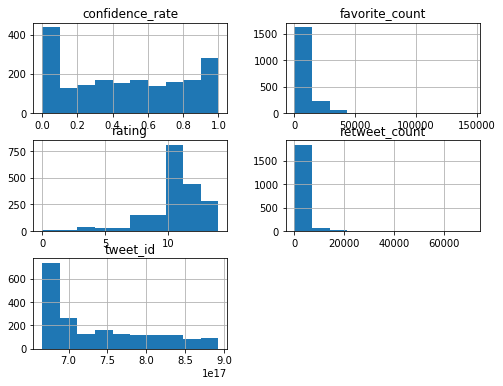

In [80]:
#Exploratory Analysis
df.hist(figsize=(8,6));

### Insights

#### 1. How are the Breed Ratings distributed according to Tweets

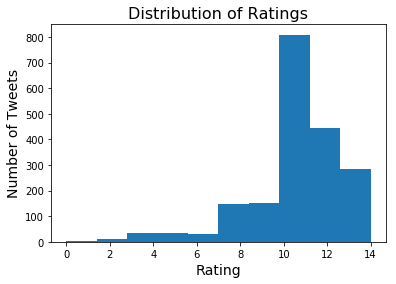

In [104]:
df['rating'].plot(kind = 'hist')
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

From the Chart above, most of the tweets are within the ratings of 10-12.

#### 2. What are the 5 most common breeds of dogs tweeted at We Rate Dogs Twitter Account ?

In [82]:
top_breeds = df[df.dog_breed != 'none'].dog_breed.value_counts().head(5)
top_breeds

golden_retriever      154
Labrador_retriever    100
Pembroke               94
Chihuahua              90
pug                    62
Name: dog_breed, dtype: int64

In [83]:
total_breed_count = df[df.dog_breed != 'none'].dog_breed.value_counts()
total_breed_count

golden_retriever                  154
Labrador_retriever                100
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         49
chow                               47
Samoyed                            41
Pomeranian                         40
malamute                           33
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Maltese_dog                        19
Staffordshire_bullterrier          19
Rottweiler                         18
Shetland_sheepdog                  18
Italian_greyhound                  17
Lakeland_terrier                   17
basset      

In [84]:
perc_top_breeds = top_breeds.sum() / total_breed_count.sum()
perc_top_breeds * 100

30.432136335970782

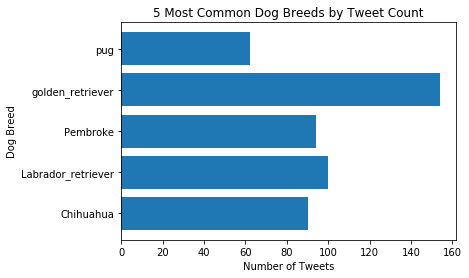

In [102]:
plt.barh(top_breeds.index, top_breeds)
plt.xlabel('Number of Tweets')
plt.ylabel('Dog Breed')
plt.title('5 Most Common Dog Breeds by Tweet Count')

The 5 most common dog breeds tweeted about in We Rate Dogs are in ascending order; golden_retriever  with 154 tweets, Labrador_retriever with 100 tweets, Pembroke with 94 tweets, Chihuahua with 90 tweets and last but not least pug with 62 tweets. We can also see that the 5 most common breeds accounts for 30.4% of total tweets (excluding breeds with none as names)

#### 3. What are the 5 breeds with most likes at We Rate Dogs Twitter Account

In [86]:
most_likes = df[df.dog_breed != 'none']
most_likes = most_likes.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending = False)
top5_likes = most_likes.head(5)
top5_likes

dog_breed
golden_retriever      1678590
Labrador_retriever    1021490
Pembroke               905581
Chihuahua              667158
French_bulldog         526327
Name: favorite_count, dtype: int64

In [87]:
total_likes = most_likes

In [88]:
perc_top5_likes = top5_likes.sum() / total_likes.sum()
perc_top5_likes * 100

36.146735161855091

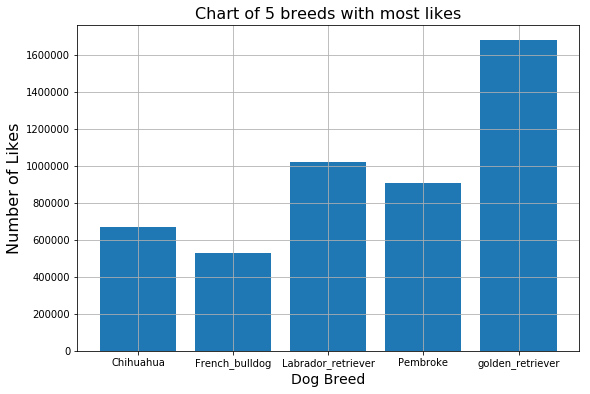

In [101]:
plt.figure (figsize=(9,6))
plt.bar(top5_likes.index, top5_likes);
plt.xlabel('Dog Breed',fontsize=14)
plt.ylabel('Number of Likes',fontsize=16)
plt.title('Chart of 5 breeds with most likes', fontsize=16)
plt.grid()

From the Chart above, we can deduct that the top 5 dog breeds with most likes according to We Rate Dogs  are (in ascending order); golden_retriever  with 1,678,675 likes, Labrador_retriever with 1,021,551 likes, Pembroke with 905,626 likes, Chihuahua with 667,244 likes, and French_bulldog with 526,365 likes. We can also see that the 5 dog breeds with most likes accounts for 36.14% of total likes (excluding breeds with none as names)

#### 4. What dog breeds does 5 most common and 5 breeds most likes have in common ? 

In [90]:
set(top_breeds.index) & set(top5_likes.index)

{'Chihuahua', 'Labrador_retriever', 'Pembroke', 'golden_retriever'}

Four dog breeds including Chihuahua, Labrador_retriever, Pembroke, and golden_retriever are found in both Top 5 dogs with most likes and 5 most common dog breed according to tweet count. Which suggests these breeds generate more traffic for We rate dogs twitter account.

#### 5. What is the Percentage of Breeds without names to the total Breed Tweet counts

In [91]:
none_count = df[df.dog_breed == 'none'].dog_breed.value_counts().sum()

In [92]:
total_count = df.dog_breed.value_counts().sum()

In [93]:
perc_none_breed = none_count / total_count
perc_none_breed * 100

15.526992287917738

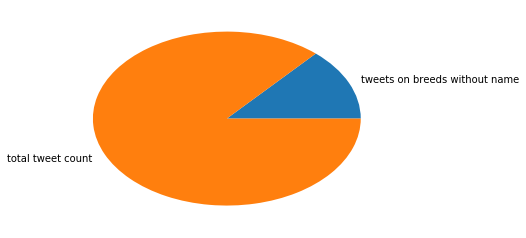

In [100]:
plt.pie([none_count, total_count], labels = ['tweets on breeds without name', 'total tweet count']);


From the above Chart, we can deduct that tweets wihout breed accounts for 15.5% of the total tweet generated in We rate Dogs twitter account.